In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


KaggleのTGS Salt Identification Challengeのデータセットを使用し、セグメンテーションを行います。

TGS Salt Identification Challenge | Kaggle

セグメンテーション手法としてU-Net[1]を使います。

[1]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015

https://arxiv.org/pdf/1505.04597.pdf

【問題1】学習・推定

In [0]:
import os

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/DIC/sprint20/unet-master')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.zip to train.zip


In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/DIC/sprint20/unet-master/data/membrane')

細胞のセグメンテーションの推定の解答例

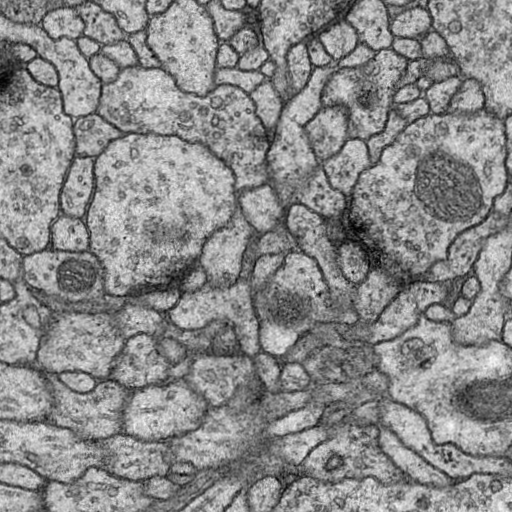

In [0]:
from PIL import Image
%matplotlib inline

    
Image.open('train-volume.tif')

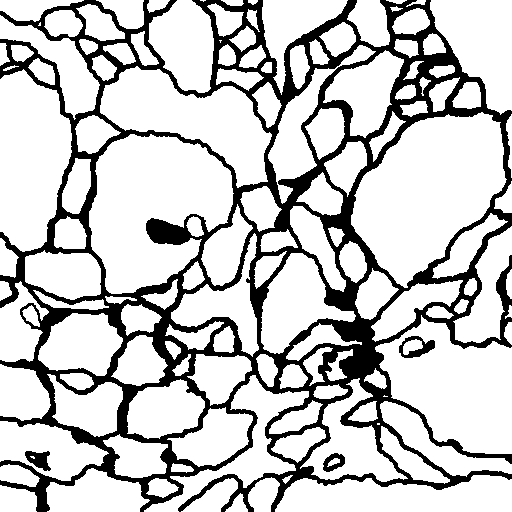

In [0]:
Image.open('train-labels.tif')

In [0]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/DIC/sprint20/unet-master'

In [0]:
!mkdir ./imagess

In [0]:
!mv image ./data/membrane/test

In [0]:
import os
os.chdir('./data/membrane/test/image')

# 連番リネーム
import glob, os # --- (*1)
# ファイル列挙 --- (*2)
files = glob.glob("*.png")
# 繰り返しリネーム --- (*3)
i = 0
for old_name in files:
     # 数値を三桁(001)形式にそろえる --- (*4)
     zero_i = "{}".format(i)
     # ファイル名を作る
     new_name = zero_i + ".png"
     # 改名する --- (*5)
     os.rename(old_name, new_name)
     # 状況を報告
     print(old_name + "→" + new_name)
     # 連番のため数値を加算 --- (*6)
     i += 1

ef00c008bc.png→0.png
353bca9171.png→1.png
cbd649b1ee.png→2.png
0c7a052374.png→3.png
309400bf90.png→4.png
6d5ad4ab9e.png→5.png
e895c207eb.png→6.png
e5c3b78df0.png→7.png
4dee03c883.png→8.png
df8f7ad6a1.png→9.png
1180277e3f.png→10.png
5f487741b7.png→11.png
2e616e1cde.png→12.png
f518cd6d26.png→13.png
fc017371d0.png→14.png
06cdaef7b0.png→15.png
a19987ca28.png→16.png
11c70402fd.png→17.png
ce4a1c6a57.png→18.png
d65f579350.png→19.png
3df20bcdfb.png→20.png
ccd5f44474.png→21.png
b16b9fa3da.png→22.png
12b47dcb66.png→23.png
052c50e4e6.png→24.png
b6d5ad81c3.png→25.png
9afd54b9a1.png→26.png
42e58ae641.png→27.png
6a2dd17071.png→28.png
ed2151b47c.png→29.png
f1f3eaa428.png→30.png
c28f0753df.png→31.png
90ede84c79.png→32.png
d2862ced4d.png→33.png
bbcfa77705.png→34.png
06fa0b053b.png→35.png
1f24885947.png→36.png
628e8fc49b.png→37.png
294983be8c.png→38.png
bd48b27bd3.png→39.png
3c7ee1e49e.png→40.png
74ce107a84.png→41.png
4ca0c2e20f.png→42.png
4a4573191e.png→43.png
82904b406b.png→44.png
b1a8e768af.png→45.pn

### 予測推定

In [0]:
%run ./main.py

/content/drive/My Drive/Colab Notebooks/DIC/sprint20/unet-master/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/1
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
300/300 [==============================] - 57s 190ms/step - loss: 0.6913 - acc: 0.7325

Epoch 00001: loss improved from inf to 0.69129, saving model to unet_membrane.hdf5
30/30 [==============================] - 13s 434ms/step


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ./data/membrane/test/result/0_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
W0617 02:04:21.854587 139842250094464 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ./data/membrane/test/result/1_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
W0617 02:04:21.871381 139842250094464 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: ./data/membrane/test/result/2_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
W0617 02:04:21.882160 139842250094464 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. 

In [0]:
os.chdir("./data/membrane/test/result")

### 予測結果が指定フォルダに格納されているか確認

In [0]:
!ls

0_predict.png	15_predict.png	20_predict.png	26_predict.png	4_predict.png
10_predict.png	16_predict.png	21_predict.png	27_predict.png	5_predict.png
11_predict.png	17_predict.png	22_predict.png	28_predict.png	6_predict.png
12_predict.png	18_predict.png	23_predict.png	29_predict.png	7_predict.png
13_predict.png	19_predict.png	24_predict.png	2_predict.png	8_predict.png
14_predict.png	1_predict.png	25_predict.png	3_predict.png	9_predict.png


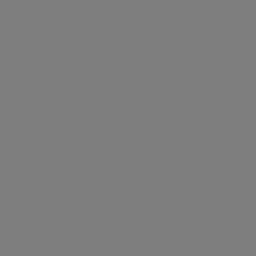

In [0]:
from PIL import Image
%matplotlib inline

    
Image.open('0_predict.png')

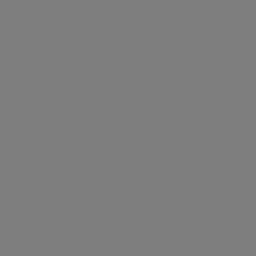

In [0]:
Image.open('1_predict.png')

今回は学習量が足りないためちゃんとしたセグメンテーションが出来ていない。
エポック数を重ねればちゃんとしたセグメンテーションができるはず。

# 【問題2】コードリーディング
論文[https://arxiv.org/pdf/1505.04597.pdf](https://arxiv.org/pdf/1505.04597.pdf)に目を通した上で、上記実装のコードリーディングを行ってください。

In [20]:
!cat main.py

from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'./data/membrane/train','images','label',data_gen_args,save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

testGene = testGenerator("./data/membrane/test/image")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("./data/membrane/test/result",results)

# コード説明
data_gen_args  
はオーギュメンテーションで回転率を0.2横と縦の移動率を0.05。  
シアー変換や拡大率水平方向の左右逆転あり。  
ちなみに左右逆転ありは文字などの非対称性があるものには使わない。  
あくまでも自然に存在する対称性があるものに使う。
  
  
## trainGenerator()  
  画像とマスクを同時に生成する
  imageとmaskの変換が同じになるように、image_datagenとmask_datagenに同じシードを使用する。
  ジェネレータの結果を視覚化したい場合は、save_to_dir = "your path"を設定する。
  
## unet()
[https://github.com/zhixuhao/unet](https://github.com/zhixuhao/unet)
unetクラスの定義  
  
## fit_generator()  
[ModelクラスAPI](https://keras.io/ja/models/model/)
Pythonジェネレータ（またはSequenceのインスタンス）によりバッチ毎に生成されたデータでモデルを訓練します．

本ジェネレータは効率性のためモデルに並列して実行されます．例えば，モデルをGPUで学習させながら  
CPU上で画像のリアルタイムデータ拡張を行うことができるようになります．

use_multiprocessing=Trueのときに，keras.utils.Sequenceを使うことで順序とエポックごとに全入力を1度だけ使用することを保証します．
  
  
## testGenerator()  
def testGenerator(test_path,num_image = 30,target_size = (256,256),flag_multi_class = False,as_gray = True):  
    for i in range(num_image):  
        img = io.imread(os.path.join(test_path,"%d.png"%i),as_gray = as_gray)  
        img = img / 255  
        img = trans.resize(img,target_size)  
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img  
        img = np.reshape(img,(1,)+img.shape)  
        yield img  
        
        
## predict_generator
[https://keras.io/ja/models/model/#predict_generator](https://keras.io/ja/models/model/#predict_generator)  
データジェネレータから得た入力サンプルに対する予測を生成する．

## saveResult

def saveResult(save_path,npyfile,flag_multi_class = False,num_class = 2):  
    for i,item in enumerate(npyfile):  
        img = labelVisualize(num_class,COLOR_DICT,item) if flag_multi_class else item[:,:,0]  
        io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
        
最終的にio.imsaveで保存している。  